<a href="https://colab.research.google.com/github/aniket-alt/Clustering_Assignment/blob/main/Task_(c)_Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GMM BIC Score: 1561.84
GMM Silhouette Score: 0.7023


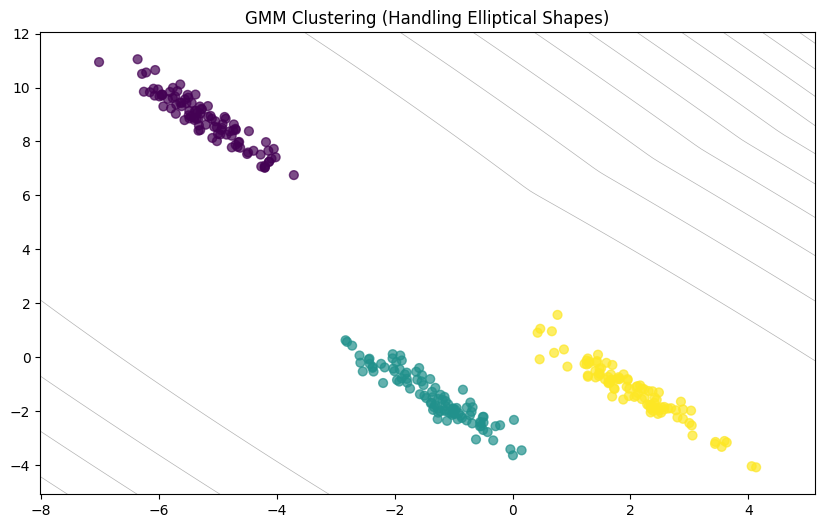

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. GENERATE ANISOTROPIC DATA (Stretched clusters)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
transformation = [[0.6, -0.6], [-0.4, 0.8]] # Stretch the data
X_stretched = np.dot(X, transformation)

# 2. FIT GMM
# We test GMM with 3 components
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_stretched)
labels = gmm.predict(X_stretched)

# 3. QUALITY MEASURES
# BIC (Lower is better) and Silhouette
print(f"GMM BIC Score: {gmm.bic(X_stretched):.2f}")
print(f"GMM Silhouette Score: {silhouette_score(X_stretched, labels):.4f}")

# 4. VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis', alpha=0.7)
plt.title("GMM Clustering (Handling Elliptical Shapes)")

# Plotting the "Probability density" contours (optional but looks great)
x_min, x_max = X_stretched[:, 0].min() - 1, X_stretched[:, 0].max() + 1
y_min, y_max = X_stretched[:, 1].min() - 1, X_stretched[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=10, linewidths=0.5, colors='black', alpha=0.3)
plt.show()